In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/infectious-diseases-by-county-year-and-sex.csv")

In [3]:
df.head()

,Disease,County,Year,Sex,Cases,Population,Lower 95% CI,Upper 95% CI,Rate
0,Amebiasis,ALAMEDA,2001,FEMALE,7.0,746596,0.377,1.932,0.938*
1,Amebiasis,ALAMEDA,2001,MALE,9.0,718968,0.572,2.376,1.252*
2,Amebiasis,ALAMEDA,2001,TOTAL,16.0,1465564,0.624,1.773,1.092*
3,Anaplasmosis and Ehrlichiosis,ALAMEDA,2001,FEMALE,0.0,746596,0.000,0.494,-
4,Anaplasmosis and Ehrlichiosis,ALAMEDA,2001,MALE,0.0,718968,0.000,0.513,-


Amebiasis


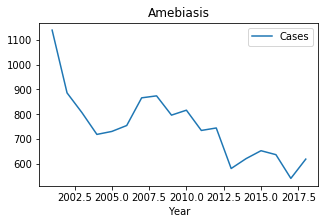

Anaplasmosis and Ehrlichiosis


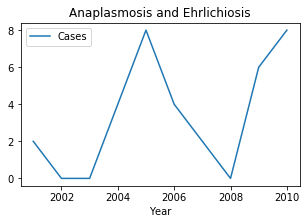

Anthrax


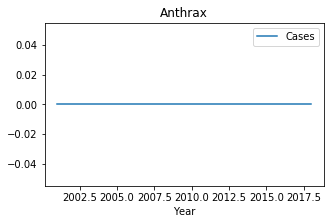

Babesiosis


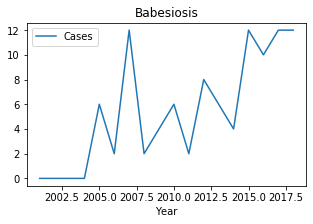

Botulism, Foodborne


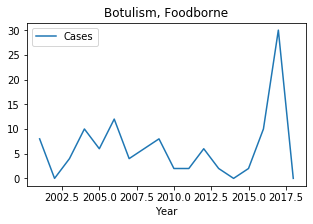

Botulism, Other


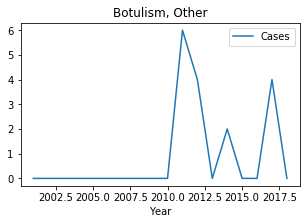

Botulism, Wound


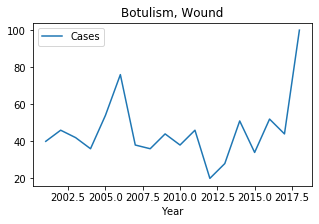

Brucellosis


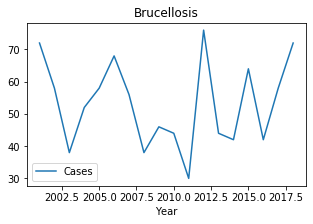

Campylobacteriosis


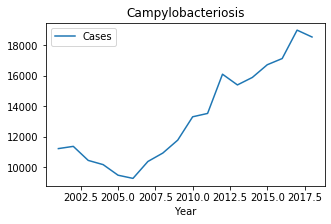

Cholera


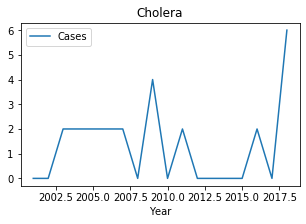

Ciguatera Fish Poisoning


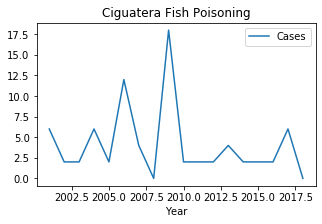

Coccidioidomycosis


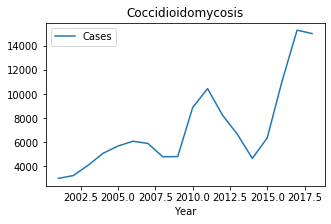

Cryptosporidiosis


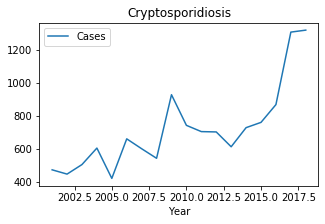

Cyclosporiasis


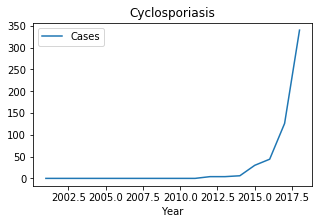

Cysticercosis or Taeniasis


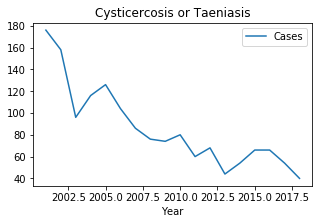

Dengue Virus Infection


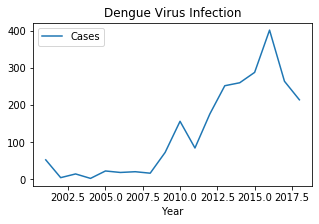

Domoic Acid Poisoning


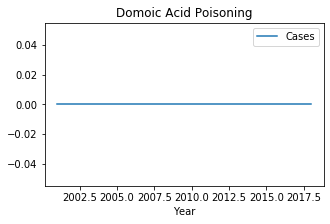

E. coli O157


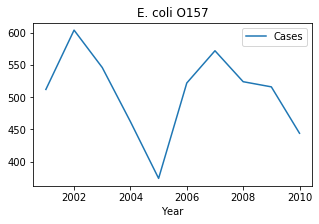

Giardiasis


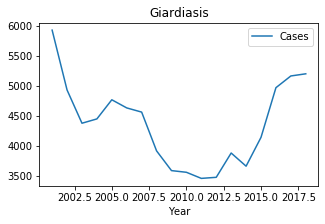

Hantavirus Infection


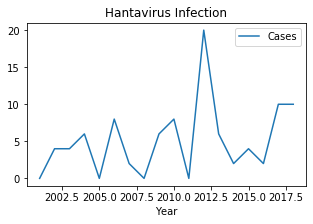

Hemolytic Uremic Syndrome (HUS)


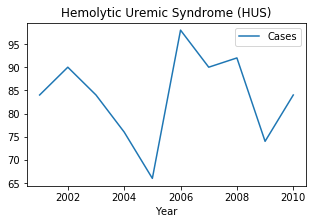

Hepatitis E, acute infection


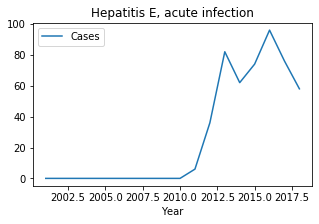

Legionellosis


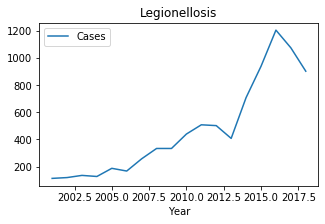

Leprosy (Hansen's Disease)


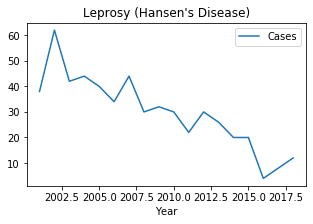

Leptospirosis


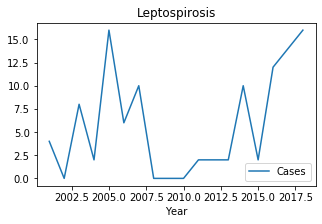

Listeriosis


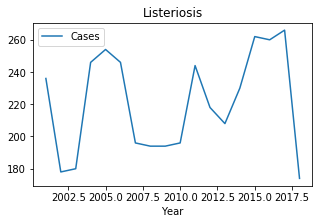

Lyme Disease


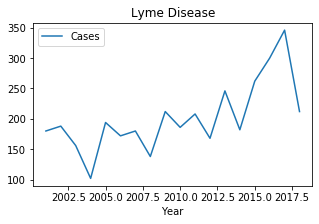

Malaria


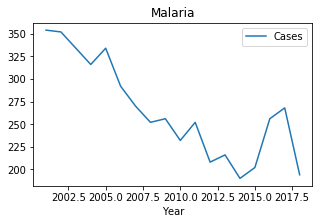

Paralytic Shellfish Poisoning


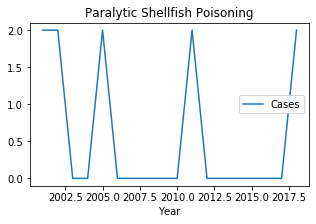

Plague, human


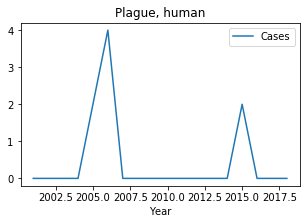

Psittacosis


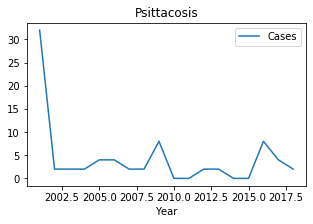

Q Fever


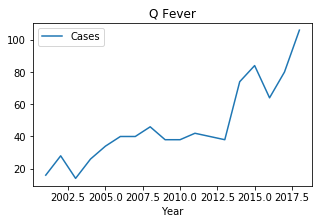

Rabies, human


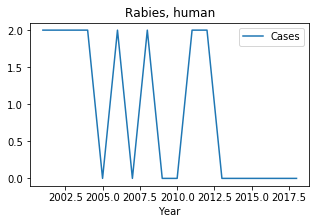

Relapsing Fever


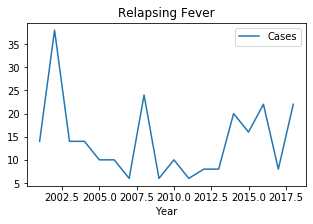

Salmonellosis


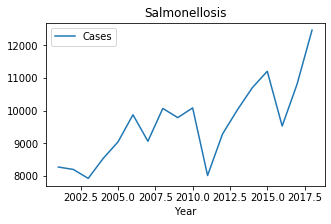

Scombroid Fish Poisoning


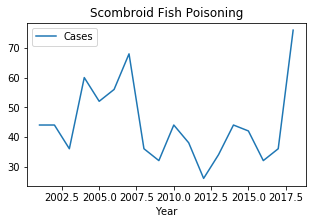

Shigellosis


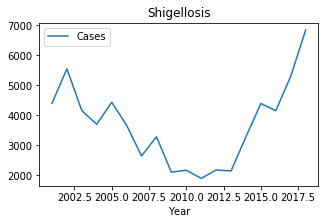

Spotted Fever Rickettsiosis


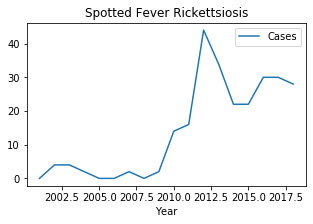

Streptococcal Infection (cases in food and dairy workers)


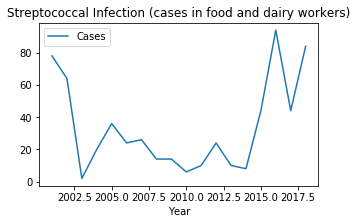

Trichinosis


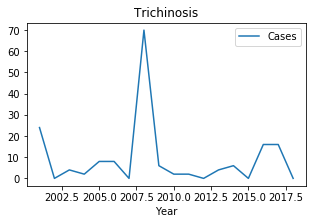

Tularemia


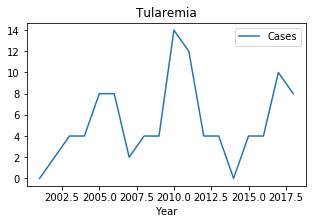

Typhoid Fever


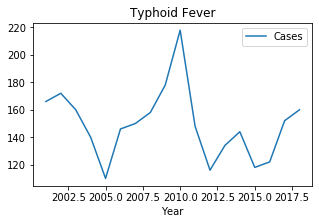

Typhus Fever


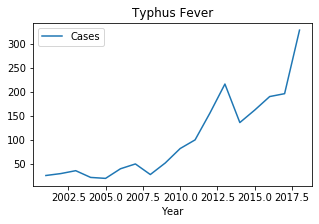

Vibrio Infection (non-Cholera)


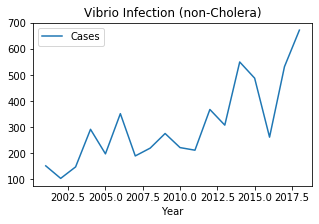

Yersiniosis


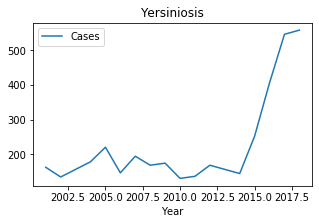

E. coli Other STEC (non-O157)


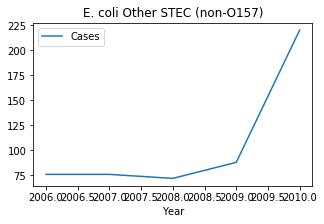

Creutzfeldt-Jakob Disease and other Transmissible Spongiform Encephalopathies


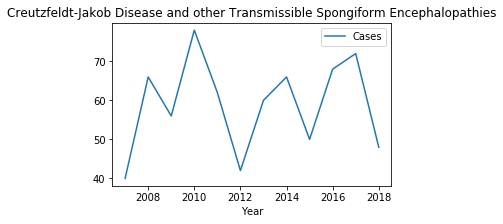

Shiga Toxin Positive Feces (without culture confirmation)


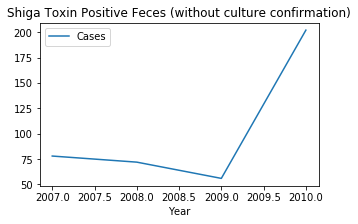

Anaplasmosis


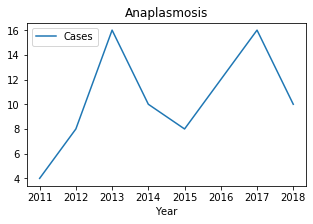

Ehrlichiosis


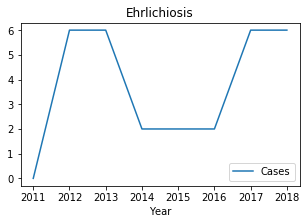

Hemolytic Uremic Syndrome (HUS) without evidence of Shiga toxin-producing E. coli (STEC)


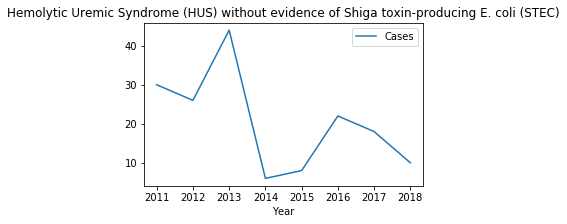

Paratyphoid Fever


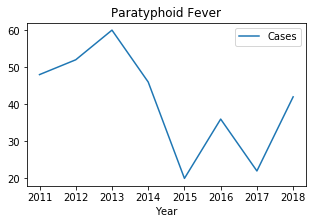

Shiga toxin-producing E. coli (STEC) with Hemolytic Uremic Syndrome (HUS)


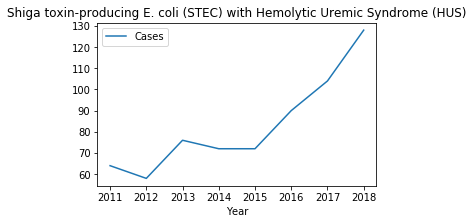

Shiga toxin-producing E. coli (STEC) without Hemolytic Uremic Syndrome (HUS)


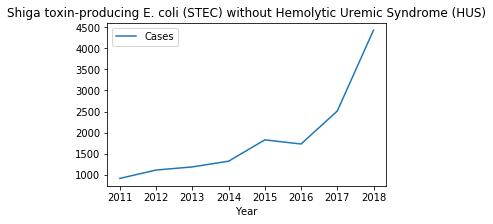

Yellow Fever


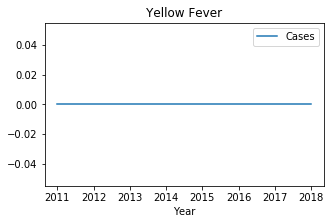

Chikungunya Virus Infection


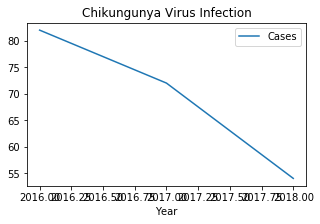

Flavivirus Infection of Undetermined Species


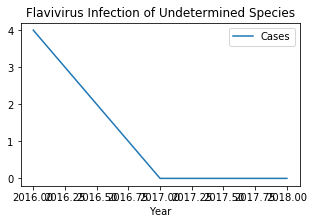

Zika Virus Infection


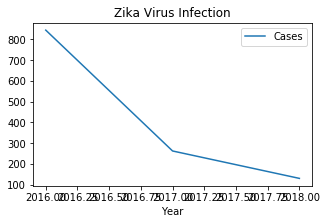

In [4]:
diseases = df['Disease'].unique()

d_list = []
for d in diseases:
    tmp_df = df[df['Disease'] == d]
    total_tmp_df = tmp_df[tmp_df['Sex'] == 'TOTAL']
    d_list.append(total_tmp_df)
    print(d)
    total_sum = []
    for c in total_tmp_df['Year'].unique():
        #print(c, total_tmp_df[total_tmp_df['Year'] == c]['Cases'].sum())
        total_sum.append((c, total_tmp_df[total_tmp_df['Year'] == c]['Cases'].sum()))
    total_sum = pd.DataFrame(total_sum, columns=['Year', 'Cases'])
    
    fig, ax = plt.subplots(figsize=(5,3))
    total_sum.plot(x='Year', y='Cases', ax=ax)
    plt.title(d)
    plt.show()

In [5]:
d_list[0]

,Disease,County,Year,Sex,Cases,Population,Lower 95% CI,Upper 95% CI,Rate
2,Amebiasis,ALAMEDA,2001,TOTAL,16.0,1465564,0.624,1.773,1.092*
137,Amebiasis,ALAMEDA,2002,TOTAL,9.0,1468468,0.280,1.163,0.613*
272,Amebiasis,ALAMEDA,2003,TOTAL,7.0,1467187,0.192,0.983,0.477*
407,Amebiasis,ALAMEDA,2004,TOTAL,7.0,1465540,0.192,0.984,0.478*
542,Amebiasis,ALAMEDA,2005,TOTAL,9.0,1459882,0.282,1.170,0.616*
...,...,...,...,...,...,...,...,...,...
153569,Amebiasis,YUBA,2014,TOTAL,1.0,73876,0.034,7.542,1.354*
153719,Amebiasis,YUBA,2015,TOTAL,1.0,74529,0.034,7.476,1.342*
153869,Amebiasis,YUBA,2016,TOTAL,0.0,75429,0.000,4.890,-
154028,Amebiasis,YUBA,2017,TOTAL,2.0,76767,0.316,9.411,2.605*


In [22]:
county_info = pd.read_csv("data/county_info.csv", sep=';')

county_info['Per capita income'] = county_info['Per capita income'].apply(lambda x: x.replace('$', ''))
county_info['Median household income'] = county_info['Median household income'].apply(lambda x: x.replace('$', ''))
county_info['Median family income'] = county_info['Median family income'].apply(lambda x: x.replace('$', ''))

county_info['Per capita income'] = county_info['Per capita income'].astype(int)
county_info['Median household income'] = county_info['Median household income'].astype(int)
county_info['Median family income'] = county_info['Median family income'].astype(int)

county_info.head()

,County,Population,Population Density,Per capita income,Median household income,Median family income
0,Alameda,1559308,2109.8,36439,73775,90822
1,Alpine,1202,1.6,24375,61343,71932
2,Amador,37159,62.5,27373,52964,68765
3,Butte,221578,135.4,24430,43165,56934
4,Calaveras,44921,44.0,29296,54936,67100


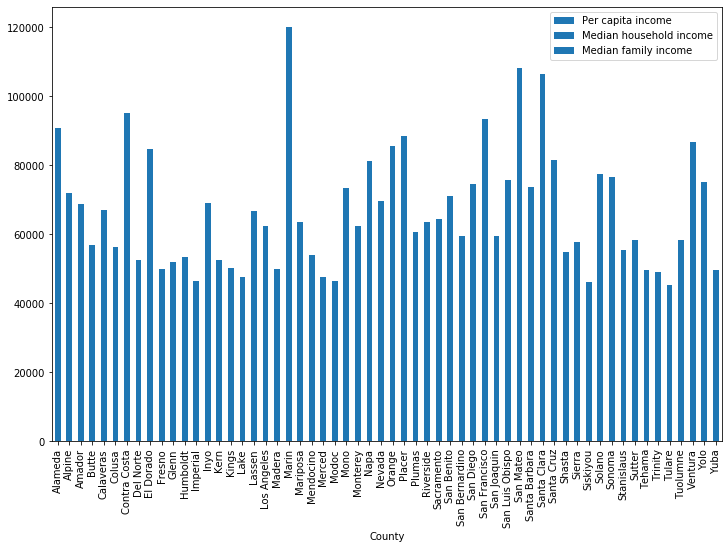

In [27]:
fig, ax = plt.subplots(figsize=(12,8))
county_info.plot(kind='bar', x='County', y='Per capita income', ax=ax)
plt.show()
county_info.plot(kind='bar', x='County', y='Median household income', ax=ax)
county_info.plot(kind='bar', x='County', y='Median family income', ax=ax)
